In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [11]:
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

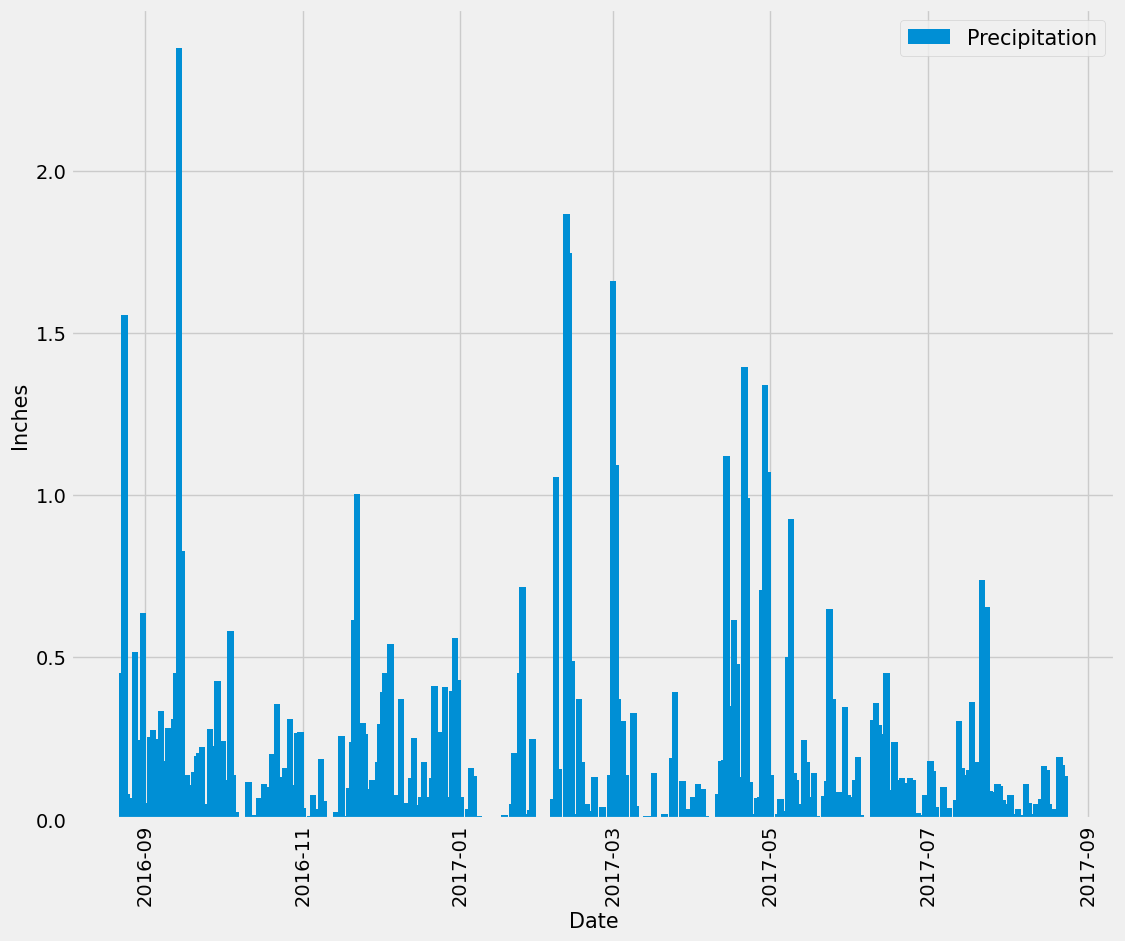

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017, 8, 23) + relativedelta(months=-12)
# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date,func.avg(Measurement.prcp)).\
    filter(Measurement.date>=query_date).\
    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(date_prcp, columns = ['date', 'prcp'])
df.date = pd.to_datetime(df.date)

df.set_index('date', inplace =True)
# Sort the dataframe by date
df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize=(12, 10))

plt.bar(df.index,df['prcp'],width=2.5)
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize =15)
plt.ylabel('Inches', fontsize =15)
plt.xticks(rotation=90)
plt.legend(['Precipitation'],fontsize =15)

plt.show()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stat = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_stat

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_stat = active_stat[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_stat).all()

[(54.0, 71.66378066378067, 85.0)]

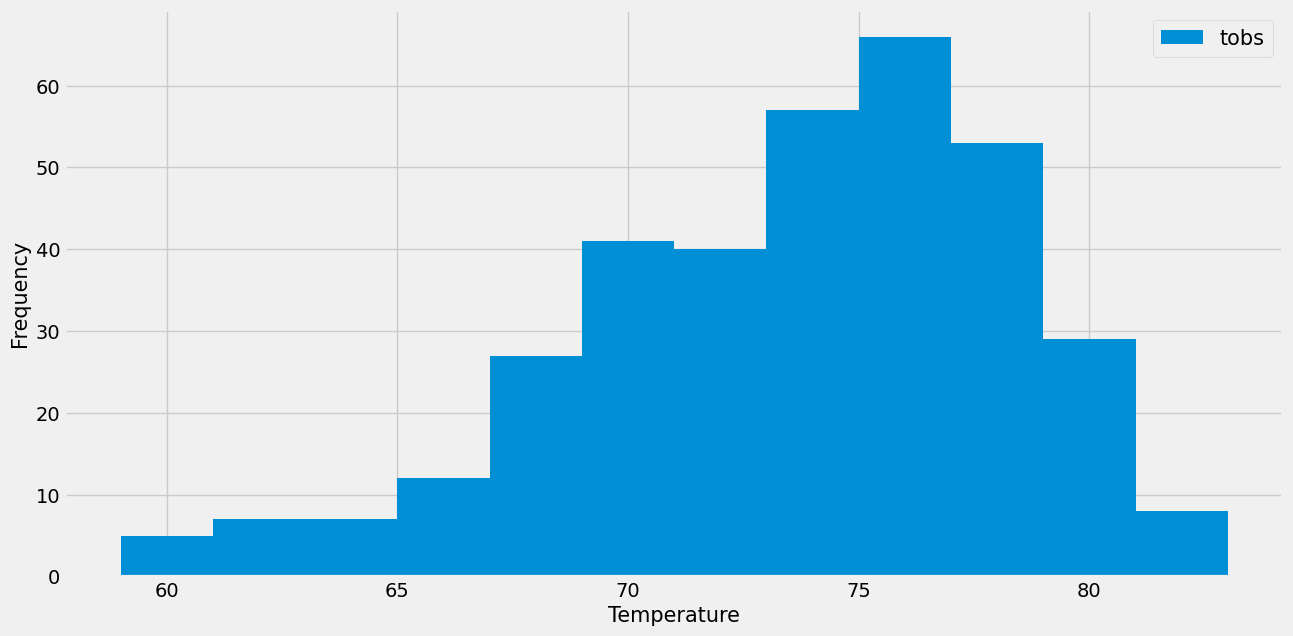

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.tobs).\
    filter(Measurement.date>='2016-08-23').\
    filter(Station.station == Measurement.station).\
    filter(Station.name == 'WAIHEE 837.5, HI US').all()
observation = [t[0] for t in temp_observation]


fig1, ax1 = plt.subplots(figsize=(14, 7))
plt.hist(observation, 12, label = 'tobs')
plt.xlabel('Temperature',fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()



# Close session

In [ ]:
# Close Session
session.close()